# SC42x 
## 자연어처리 (Natural Language Processing)

# Part 1 : 개념 요약

> 다음의 키워드에 대해서 **한 줄**로 간단하게 요약해주세요. (세션 노트를 참고하여도 좋습니다.)<br/>
> **Tip : 아래 문제를 먼저 수행한 후 모델 학습 등 시간이 오래 걸리는 셀이 실행되는 동안 아래 내용을 작성하면 시간을 절약할 수 있습니다.**

**N421**
- Stopwords(불용어) : 분석할 때 의미가 없는 단어 예를 들어 제품 리뷰를 이해 하는데 I, and, of 같은 단어들은 의미가 없는데 이들을 불용어라고 한다.
- Stemming과 Lemmatization : 어간 추출(Stemming)이란 단어의 의미가 포함된 부분으로 접사등이 제거된 형태로 만드는 것으로 예를 들어 argue, argued, arguing, argus의 뒷부분인 ing, ed, s를 제거 하는 과정이며 argu라는 어간을 뽑아내는 과정이며,
표제어 추출(Lemmatization)이란 어간 추출보다 체계적으로 단어들의 기본 사전형 단어 형태인 표제어로 변환하는 과정이며 예를 들어 명사의 복수형은 단수형으로, 동사는 모두 타동사로 변환하는 과정을 말한다.
- Bag-of-Words : 가장 단순한 벡터화 방법 중 하나로 문서 혹은 문장에서 문법이나 단어의 순서 등을 무시하고 단순히 단어들의 빈도만 고려하여 벡터화 하는 과정
- TF-IDF : 전체적인 문서군에서 자주 등장하는 단어들은 DF ( 문서 빈도 ) 라고 하며, 이 값의 역수를 IDF ( 역문서 빈도 ) 라 하고, 그리고 그 값과 TF ( 단어 빈도 ) 값을 곱해 준 값이 TF-IDF 라고 한다.

**N422**
- Word2Vec : 단어를 벡터로 나타내는 가장 널리 쓰이는 임베딩 방법 중 하나.
- fastText : Word2Vec 방식에 철자 (Character) 기반의 임베딩 방식을 더한 새로운 임베딩 방식이다.

**N423**
- RNN : 연속형 데이터들을 잘 처리하기 위해 고안된 신경망으로 기존 신경망에는 없던 출력 벡터가 다시 입력되는 특성 때문에 순환(Recurrent) 신경망 이라는 이름이 붙었다.
- LSTM, GRU : LSTM은 Long-Short Term Memory로 장단기 기억망이라 하며 RNN의 기울기 정보 크기를 조절하고자 Gate를 3개 추가했으며, 내부의 Cell-state는 역전파 과정에서 활성화 함수를 거치지 않아 앞쪽 시퀀스의 정보를 어느정도 잃지 않게 해주는 모델이며, 
GRU는 Gate Recurrent Unit으로 LSTM의 간소화 버전이며, LSTM의 Output Gate가 없어졌으며, Cell-state의 벡터와 hidden-state 벡터가 통합되어 하나의 벡터로 출력된다.
- Attention : 인코더에서 각 Time-step 마다 생성되는 hidden-state 벡터들을 모아서 디코더의 hidden-state 벡터와 내적한 값을 이용해 모든 단어가 영향력을 잃지 않게 해주는 과정이다.

# Part 2 : Fake/Real News Dataset

한 주간 자연어처리 기법을 배우면서 여러분은 다양한 기술들을 접했습니다.<br/>
어떻게 텍스트 데이터를 다뤄야 하는지, 텍스트를 벡터화 하는 법, 문서에서 토픽을 모델하는 법 등 다양한 NLP 기법을 배웠는데요.<br/>
이번 스프린트 챌린지에선 [Fake/Real News Dataset](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset)을 사용하여 배운 것들을 복습해보는 시간을 갖겠습니다.

**주의 : 모델의 성능을 최대한 끌어올리는 것이 아닌 모델 구동에 초점을 맞춰주세요.<br/>
모든 문제를 완료한 후에도 "시간이 남았다면" 정확도를 올리는 것에 도전하시는 것을 추천드립니다.**

In [1]:
# 코드 실행 전 seed를 지정하겠습니다.
import numpy as np
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

## 2.0 데이터셋을 불러옵니다.

- 위 캐글 링크에서 데이터셋을 받아 업로드 합니다.<br/>
(직접 업로드하게 되면 시간이 꽤 걸리므로 **drive_mount** 나 **kaggle 연동**하시는 것을 추천드립니다.)

- 'label' 열을 만들어 Fake = 1, True = 0 로 레이블링해줍니다.
- 두 파일을 합쳐 하나의 데이터프레임에 저장해 준 후 데이터를 섞어줍니다.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [75]:
import pandas as pd

fake = pd.read_csv('/content/drive/MyDrive/Fake.csv')
true = pd.read_csv('/content/drive/MyDrive/True.csv')

true['label'] = [0 for _ in range(true.shape[0])]
fake['label'] = [0 for _ in range(fake.shape[0])]

df = pd.concat([true, fake], ignore_index=True)

true.shape, fake.shape, df.shape

((21417, 5), (23481, 5), (44898, 5))

## 2.1 TF-IDF 를 활용하여 특정 뉴스와 유사한 뉴스 검색하기

시간상 특별한 **전처리 없이** 아래 태스크를 수행하겠습니다.

In [76]:
df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


### 2.1.1 TFidfVectorizer를 사용하여 문서-단어 행렬(Document-Term Matrix) 만들기

In [77]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# TF-IDF vectorizer. 테이블을 작게 만들기 위해 max_features=15로 제한하였습니다.
tfidf = TfidfVectorizer(stop_words='english', max_features=15)

# Fit 후 dtm을 만듭니다.(문서, 단어마다 tf-idf 값을 계산합니다)
dtm_tfidf = tfidf.fit_transform(df.text)

dtm_tfidf = pd.DataFrame(dtm_tfidf.todense(), columns=tfidf.get_feature_names())
dtm_tfidf

,clinton,donald,government,house,new,obama,people,president,republican,reuters,said,state,states,trump,year
0,0.000000,0.071750,0.171626,0.515884,0.000000,0.000000,0.140037,0.124764,0.536731,0.065566,0.398552,0.000000,0.084113,0.453636,0.000000
1,0.000000,0.071524,0.085543,0.000000,0.000000,0.378701,0.139597,0.310928,0.089174,0.065360,0.546287,0.000000,0.000000,0.646014,0.000000
2,0.099359,0.000000,0.000000,0.160666,0.145057,0.000000,0.000000,0.116568,0.250738,0.061259,0.372373,0.000000,0.000000,0.847677,0.076444
3,0.133781,0.090260,0.000000,0.324489,0.292965,0.000000,0.088083,0.156952,0.112534,0.164962,0.188016,0.000000,0.000000,0.815243,0.102927
4,0.000000,0.081392,0.292037,0.097536,0.000000,0.000000,0.000000,0.353827,0.000000,0.074377,0.395600,0.000000,0.190833,0.514601,0.556885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,0.000000,0.000000,0.000000,0.000000,0.194102,0.712426,0.000000,0.311962,0.000000,0.000000,0.124569,0.406204,0.420635,0.000000,0.000000
44894,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
44895,0.000000,0.000000,0.494734,0.000000,0.522133,0.136887,0.235476,0.059941,0.042978,0.000000,0.000000,0.585366,0.242465,0.000000,0.039309
44896,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.704537,0.000000,0.000000,0.709667


### 2.1.2 KNN 알고리즘을 사용하여 유사한 문서 검색하기

- **42번 인덱스의 문서**와 가장 유사한 **5개 문서(42번 포함)의 인덱스**와 **해당 인덱스의 레이블**을 나타내주세요.
- NN 모델의 파라미터 중 `algorithm = 'kd_tree'` 로 설정합니다.

In [78]:
# SpaCy 를 이용한 Tokenizing
import spacy
from spacy.tokenizer import Tokenizer
nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)

def tokenize(document):
    doc = nlp(document)
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True) and (token.is_alpha == True)]

In [79]:
    """
    args:
        ngram_range = (min_n, max_n), min_n 개~ max_n 개를 갖는 n-gram(n개의 연속적인 토큰)을 토큰으로 사용합니다.
        min_df = n : int, 최소 n개의 문서에 나타나는 토큰만 사용합니다.
        max_df = m : float(0~1), m * 100% 이상 문서에 나타나는 토큰은 제거합니다.
    """

tfidf_tuned = TfidfVectorizer(stop_words='english'
                        ,tokenizer=tokenize
                        ,ngram_range=(1,2)
                        ,max_df=.7
                        ,min_df=3
                       )

dtm_tfidf_tuned = tfidf_tuned.fit_transform(df['text'].iloc[0:10])
dtm_tfidf_tuned = pd.DataFrame(dtm_tfidf_tuned.todense(), columns=tfidf_tuned.get_feature_names())
dtm_tfidf_tuned.head()

,accord,accuse,action,administration,agreement,ally,american,april,base,begin,bias,bias republican,billion,california,campaign,charge,charge trump,child,clinton,collusion,come,comment,congress,conservative,continue,counsel,counsel robert,country,defense,democratic,democrats,deny,department,despite,dollar,early,edit,election,end,expect,...,secretary,senate,senator,september,set,small,speak,special,special counsel,spend,spending,statement,states,supporter,talk,tax,team,tell,think,time,times,trump administration,trump ally,trump say,twitt,twitter,united,united states,use,want,washington,washington reuters,way,wednesday,week,white,white house,work,york,york times
0,0.000000,0.000000,0.046912,0.083416,0.000000,0.000000,0.000000,0.000000,0.000000,0.041708,0.000000,0.000000,0.083416,0.046912,0.046912,0.000000,0.000000,0.046912,0.000000,0.000000,0.041708,0.000000,0.093824,0.140736,0.000000,0.000000,0.000000,0.033861,0.140736,0.037456,0.23456,0.000000,0.000000,0.000000,0.000000,0.041708,0.000000,0.033861,0.000000,0.037456,...,0.00000,0.125125,0.000000,0.046912,0.000000,0.046912,0.046912,0.000000,0.000000,0.046912,0.23456,0.000000,0.037456,0.000000,0.041708,0.375296,0.000000,0.041708,0.046912,0.000000,0.000000,0.093824,0.000000,0.000000,0.0,0.041708,0.037456,0.037456,0.041708,0.187648,0.067723,0.033861,0.041708,0.093824,0.000000,0.033861,0.033861,0.046912,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.572920,0.000000,0.000000,0.057292,0.000000,0.057292,0.171876,0.000000,0.000000,0.000000,0.064440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.114584,0.000000,0.000000,0.128881,0.064440,0.000000,0.000000,0.046513,0.257761,0.051451,0.00000,0.000000,0.257761,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051451,...,0.06444,0.000000,0.000000,0.064440,0.057292,0.000000,0.064440,0.000000,0.000000,0.000000,0.00000,0.057292,0.000000,0.064440,0.000000,0.000000,0.000000,0.000000,0.000000,0.102903,0.000000,0.128881,0.000000,0.051451,0.0,0.057292,0.000000,0.000000,0.057292,0.000000,0.139540,0.046513,0.057292,0.000000,0.114584,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.052722,0.000000,0.093747,0.000000,0.210888,0.000000,0.000000,0.000000,0.000000,0.052722,0.052722,0.000000,0.000000,0.316332,0.000000,0.000000,0.000000,0.052722,0.052722,0.000000,0.000000,0.000000,0.000000,0.105444,0.105444,0.052722,0.000000,0.000000,0.000000,0.00000,0.105444,0.105444,0.105444,0.000000,0.093747,0.000000,0.152220,0.000000,0.042095,...,0.00000,0.093747,0.046874,0.000000,0.000000,0.000000,0.000000,0.105444,0.105444,0.000000,0.00000,0.000000,0.000000,0.052722,0.000000,0.000000,0.105444,0.000000,0.052722,0.042095,0.105444,0.052722,0.158166,0.000000,0.0,0.000000,0.000000,0.000000,0.046874,0.158166,0.076110,0.038055,0.093747,0.000000,0.093747,0.038055,0.038055,0.000000,0.105444,0.105444
3,0.067316,0.067316,0.067316,0.000000,0.000000,0.067316,0.059849,0.067316,0.059849,0.059849,0.067316,0.067316,0.000000,0.000000,0.336582,0.119698,0.067316,0.000000,0.067316,0.067316,0.059849,0.269266,0.000000,0.000000,0.000000,0.134633,0.067316,0.000000,0.000000,0.107496,0.00000,0.067316,0.000000,0.000000,0.000000,0.000000,0.067316,0.048589,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.059849,0.000000,0.000000,0.134633,0.134633,0.000000,0.00000,0.059849,0.000000,0.000000,0.000000,0.000000,0.067316,0.059849,0.000000,0.107496,0.201949,0.000000,0.067316,0.053748,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.048589,0.048589,0.000000,0.000000,0.000000,0.145768,0.145768,0.000000,0.201949,0.201949
4,0.284977,0.000000,0.000000,0.000000,0.056995,0.000000,0.050673,0.056995,0.050673,0.000000,0.000000,0.000000,0.354711,0.000000,0.000000,0.202692,0.056995,0.000000,0.000000,0.000000,0.000000,0.227982,0.000000,0.000000,0.000000,0.000000,0.000000,0.041140,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.113991,0.050673,0.000000,0.000000,0.113991,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.101346,0.056995,0.000000,0.000000,0.000000,0.056995,0.0000

In [80]:
dtm_tfidf_tuned.shape

(10, 161)

In [81]:
tfidf_vect = TfidfVectorizer(stop_words='english', max_features=100)

# Fit 후 dtm을 만듭니다.(문서, 단어마다 tf-idf 값을 계산합니다)
dtm_tfidf_news = tfidf_vect.fit_transform(df['text'])

dtm_tfidf_news = pd.DataFrame(dtm_tfidf_news.todense(), columns=tfidf_vect.get_feature_names())
dtm_tfidf_news

,000,2016,according,administration,america,american,americans,asked,called,campaign,china,city,clinton,committee,congress,country,court,day,democratic,democrats,department,did,don,donald,election,federal,foreign,friday,going,government,group,hillary,house,image,including,just,know,law,like,make,...,public,republican,republicans,reuters,right,russia,russian,said,say,saying,says,secretary,security,senate,state,statement,states,support,tax,think,thursday,time,told,trump,tuesday,twitter,united,vote,want,war,washington,way,wednesday,week,white,women,work,world,year,years
0,0.000000,0.000000,0.000000,0.100575,0.000000,0.000000,0.000000,0.000000,0.045557,0.000000,0.0,0.000000,0.000000,0.000000,0.110597,0.042812,0.000000,0.000000,0.049596,0.284336,0.000000,0.042666,0.0477,0.034209,0.045191,0.160846,0.000000,0.000000,0.093176,0.081828,0.000000,0.000000,0.245962,0.000000,0.000000,0.000000,0.000000,0.049060,0.000000,0.000000,...,0.049987,0.255902,0.425183,0.031260,0.000000,0.000000,0.000000,0.190021,0.044146,0.095490,0.000000,0.000000,0.000000,0.167187,0.000000,0.000000,0.040103,0.048030,0.538793,0.048767,0.0,0.000000,0.037807,0.216284,0.0,0.050922,0.041953,0.0,0.100209,0.000000,0.083214,0.046387,0.101548,0.000000,0.043996,0.000000,0.051551,0.000000,0.000000,0.131273
1,0.000000,0.000000,0.000000,0.539628,0.000000,0.049684,0.000000,0.000000,0.048887,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.045941,0.243594,0.000000,0.053221,0.000000,0.236661,0.000000,0.0000,0.036709,0.000000,0.230136,0.000000,0.055825,0.000000,0.043904,0.054278,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.105291,0.000000,0.000000,...,0.053640,0.045768,0.000000,0.033545,0.049645,0.000000,0.000000,0.280375,0.000000,0.051235,0.000000,0.058103,0.000000,0.000000,0.000000,0.052562,0.000000,0.000000,0.000000,0.000000,0.0,0.084082,0.000000,0.331559,0.0,0.054643,0.000000,0.0,0.000000,0.000000,0.133944,0.049777,0.000000,0.049247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.063567,0.000000,0.120632,0.000000,0.000000,0.000000,0.000000,0.000000,0.324988,0.0,0.000000,0.060814,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.132262,0.000000,0.0000,0.000000,0.216814,0.064308,0.063207,0.000000,0.055879,0.000000,0.000000,0.060578,0.098338,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.153468,0.063747,0.037494,0.110980,0.562291,0.000000,0.227917,0.000000,0.000000,0.000000,0.000000,0.000000,0.133686,0.000000,0.000000,0.000000,0.000000,0.000000,0.058493,0.0,0.046991,0.000000,0.518833,0.0,0.000000,0.000000,0.0,0.120193,0.000000,0.099809,0.111275,0.000000,0.055045,0.052769,0.000000,0.000000,0.000000,0.046789,0.000000
3,0.000000,0.177079,0.076849,0.000000,0.000000,0.077351,0.000000,0.000000,0.000000,0.377219,0.0,0.000000,0.084706,0.000000,0.000000,0.000000,0.000000,0.000000,0.165715,0.000000,0.000000,0.071279,0.0000,0.057150,0.075498,0.179143,0.176077,0.000000,0.000000,0.000000,0.000000,0.084377,0.205456,0.000000,0.154605,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.071253,0.000000,0.104449,0.000000,0.293697,0.103886,0.119046,0.000000,0.079765,0.000000,0.000000,0.000000,0.000000,0.000000,0.081830,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.063161,0.516187,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.069510,0.000000,0.000000,0.000000,0.220501,0.000000,0.000000,0.000000,0.065170,0.000000
4,0.000000,0.064341,0.279229,0.000000,0.000000,0.056210,0.000000,0.000000,0.055308,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.051976,0.000000,0.059163,0.000000,0.000000,0.000000,0.000000,0.0000,0.041531,0.000000,0.065091,0.000000,0.126316,0.000000,0.149013,0.000000,0.000000,0.049768,0.000000,0.056175,0.046171,0.000000,0.059560,0.048287,0.000000,...,0.000000,0.000000,0.000000,0.037951,0.000000,0.000000,0.000000,0.201857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.097373,0.000000,0.163529,0.000000,0.0,0.047563,0.000000,0.262577,0.0,0.061821,0.152798,0.0,0.000000,0.0000

In [82]:
from sklearn.neighbors import NearestNeighbors

# dtm을 사용히 NN 모델을 학습시킵니다. (디폴트)최근접 5 이웃.
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm_tfidf_news)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [83]:
nn.kneighbors([dtm_tfidf_news.iloc[42]])

(array([[0.        , 0.38516929, 0.46109983, 0.57760059, 0.65143189]]),
 array([[  42,   23,    1,  214, 1463]]))

In [90]:
for idx in nn.kneighbors([dtm_tfidf_news.iloc[42]])[1][0]:
  print('idx :', idx, 'label :', df.label[idx])

idx : 42 label : 0
idx : 23 label : 0
idx : 1 label : 0
idx : 214 label : 0
idx : 1463 label : 0


## 2.2 Keras Embedding을 사용하여 분류하기

### 2.2.0 데이터셋 split

- Train, Test 데이터셋으로 분리(Split)하여 주세요.

In [111]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

import pandas as pd

fake = pd.read_csv('/content/drive/MyDrive/Fake.csv')
true = pd.read_csv('/content/drive/MyDrive/True.csv')

true['label'] = [0 for _ in range(true.shape[0])]
fake['label'] = [0 for _ in range(fake.shape[0])]

df = pd.concat([true, fake])

true.shape, fake.shape, df.shape

train, test = train_test_split(df[['title', 'label']], train_size=0.85, test_size=0.15, 
                              stratify=df['label'], random_state=2)

X_train, y_train, X_test, y_test = train.drop('label', axis = 1), train.label, test.drop('label', axis = 1), test.label

### 2.2.1 단어 벡터의 평균을 이용하여 분류해보기

N422에서 했던 단어 임베딩 벡터의 평균을 사용하여 문장을 분류하는 작업을 수행해봅시다.<br/>
인스턴스마다 텍스트 길이가 길고 시간이 오래 걸리므로 시간상 epoch 수를 **10 이하**로 하는 것을 추천드립니다.<br/>
모델 구동이 목적이므로 임베딩 차원 수를 크지 않게(50이하)로 설정해주세요.<br/>
**권장사항 : `max_len` 은 텍스트 길이 평균보다 높게 설정해주세요.**<br/>

> **Tip : 모델이 학습하는 동안 2.2.3의 내용을 작성하면 시간을 절약할 수 있습니다.**


In [112]:
maxlen = np.mean([len(sent) for sent in X_train.title], dtype=int)


# TF-IDF vectorizer. 테이블을 작게 만들기 위해 max_features=15로 제한하였습니다.
tfidf = TfidfVectorizer(stop_words='english', max_features=15)

# Fit 후 dtm을 만듭니다.(문서, 단어마다 tf-idf 값을 계산합니다)
X_train = tfidf.fit_transform(X_train.title)
X_train = pd.DataFrame(X_train.todense(), columns=tfidf.get_feature_names())

X_test = tfidf.fit_transform(X_test.title)
X_test = pd.DataFrame(X_test.todense(), columns=tfidf.get_feature_names())

X_train = keras.preprocessing.sequence.pad_sequences(X_train.values, maxlen=maxlen)
X_test = keras.preprocessing.sequence.pad_sequences(X_test.values, maxlen=maxlen)

X_train.shape, y_train.shape, X_test.shape, y_test.shape, len(X_train), len(X_test)

((38163, 80), (38163,), (6735, 80), (6735,), 38163, 6735)

In [113]:
print(maxlen)

80


In [114]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(2, activation="softmax")(x)

model2 = keras.Model(inputs=inputs, outputs=outputs)

In [115]:
model2.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])
history = model2.fit(
    X_train, y_train, batch_size=32, epochs=2, validation_data=(X_test, y_test)
)

Epoch 1/2
1193/1193 [==============================] - 48s 40ms/step - loss: 0.0036 - accuracy: 0.9996 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 2/2
1193/1193 [==============================] - 47s 40ms/step - loss: 2.9832e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


### 2.2.2 LSTM을 사용하여 텍스트 분류 수행해보기

N423에서 했던 단어 임베딩 벡터의 평균을 사용하여 문장을 분류하는 작업을 수행해봅시다.<br/>
인스턴스마다 텍스트 길이가 길어 시간이 매우 오래 걸리므로 <br/>
**층을 최소한으로 쌓고**, epoch 수를 **3 이하**로 하는 것을 추천드립니다.<br/>

> **Tip : 모델이 학습하는 동안 2.2.3의 내용을 작성하면 시간을 절약할 수 있습니다.**


In [120]:
fake = pd.read_csv('/content/drive/MyDrive/Fake.csv')
true = pd.read_csv('/content/drive/MyDrive/True.csv')

true['label'] = [0 for _ in range(true.shape[0])]
fake['label'] = [0 for _ in range(fake.shape[0])]

df = pd.concat([true, fake])

true.shape, fake.shape, df.shape

train, test = train_test_split(df[['title', 'label']], train_size=0.85, test_size=0.15, 
                              stratify=df['label'], random_state=2)

X_train, y_train, X_test, y_test = train.drop('label', axis = 1), train.label, test.drop('label', axis = 1), test.label

maxlen = np.mean([len(sent) for sent in X_train.title], dtype=int)


# TF-IDF vectorizer. 테이블을 작게 만들기 위해 max_features=15로 제한하였습니다.
tfidf = TfidfVectorizer(stop_words='english', max_features=15)

# Fit 후 dtm을 만듭니다.(문서, 단어마다 tf-idf 값을 계산합니다)
X_train = tfidf.fit_transform(X_train.title)
X_train = pd.DataFrame(X_train.todense(), columns=tfidf.get_feature_names())

X_test = tfidf.fit_transform(X_test.title)
X_test = pd.DataFrame(X_test.todense(), columns=tfidf.get_feature_names())

X_train = keras.preprocessing.sequence.pad_sequences(X_train.values, maxlen=maxlen)
X_test = keras.preprocessing.sequence.pad_sequences(X_test.values, maxlen=maxlen)

X_train.shape, y_train.shape, X_test.shape, y_test.shape, len(X_train), len(X_test)

# 파라미터를 설정합니다.
max_features = 20000
maxlen = maxlen
batch_size = 32

# model을 정의합니다.
"""
keras의 기본 Embedding 벡터를 사용하였으며
LSTM 층에 dropout/recurrent_dropout을 적용하였습니다.
"""
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(max_features, 128),
  tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model3.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, None, 128)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [121]:
unicorns = model3.fit(X_train, y_train,
          batch_size=batch_size, 
          epochs=2, 
          validation_data=(X_test,y_test))

Epoch 1/2
1193/1193 [==============================] - 375s 282ms/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 2.7185e-06 - val_accuracy: 1.0000
Epoch 2/2
1193/1193 [==============================] - 341s 286ms/step - loss: 1.8011e-06 - accuracy: 1.0000 - val_loss: 1.1111e-06 - val_accuracy: 1.0000


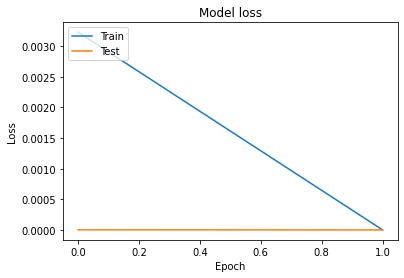

In [122]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(unicorns.history['loss'])
plt.plot(unicorns.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

### 2.2.3 위에서 실행한 내용에 대해 다시 알아봅시다.

#### a) 데이터셋을 학습할 때 사용하는 `pad_sequences`  메서드에 대해 설명해주세요.<br/>어떤 기능을 하나요? 모델을 학습할 때 왜 필요한가요?

가변 시퀀스들을 채우기 위해서 사용하며, 부자연스러운 시퀀스 문제를 해결하기 위해서 사용한다. 
기계는 전부 동일한 길이의 문서에 대해서는 하나의 행렬로 보고 묶어서 연산 할 수 있기 때문에 pad_sequences로 길이를 일정하게 맞춰서 사용한다.

#### b) 2.2.1과 2.2.2에서 사용한 각 모델의 evaluation 성능은 어떻게 나왔나요?<br/>각 모델의 장단점은 무엇이라고 생각하나요?

TF-IDF는 단기 의존성 문제를 가지지만 LSTM은 단기의존성 문제를 해결하였다.

#### c) 종래의 RNN(Recurrent Neural Networks) 대신 LSTM(Long-Short Term Memory)을 사용하는 이유는 무엇인가요?<br/>(i.e. RNN에 비해 LSTM의 좋은 점을 설명해주세요.)

RNN은 앞쪽 시퀀스의 데이터가 거의 지워져 단기 의존성 문제가 있는데 이를 해결하기위해 LSTM을 사용 한다.

#### d) LSTM이나 RNN을 사용하는 예시를 **3개**이상 제시하고 해당되는 경우에 왜 LSTM이나 RNN을 사용하는 것 적절한지 간단하게 설명해주세요.

이미지 켑셔닝, 감성 분석, 기계번역, 비디오 프레임별로 분류 하는데 사용되며 시퀀셜한 데이터들을 읽기에 LSTM과 RNN이 좋아서 사용 한다.

#### e) 이외에 N424 에서 배운 자연어처리 모델과 관련된 키워드를 3개 이상 적어주세요. <br/> (해당 키워드에 대한 설명은 옵션입니다.)

Transformer : 기계번역을 위한 새로운 모델로 등장한 Attention 매커니즘을 극대화하여 뛰어난 번역성능을 가진 모델로 RNN을 사용하지 않아 병렬화가 되서 빠르고 효과가 좋다. GPU 연산에 최적화 되어 있다.

GPT : 트렌스포머의 디코더 기반 모델이다. 비지도 학습이며 다양하고 엄청난 양의 데이터를 통해서 프리 트레이닝 된다.

BERT : 양쪽 문맥을 동시에 탐색한다.

# Advanced Goals: 3점을 획득하기 위해선 아래의 조건 중 하나 이상을 만족해야합니다
 
- 2.1 에서 TF-IDF(`TfidfVectorizer`)가 아닌 방법을 사용하여 유사도 검색을 수행해보세요.<br/>
TF-IDF와 해당 방법의 차이를 설명해주세요. 
- 2.2 에서 사용한 방법을 재사용하되 하이퍼 파라미터를 조정하거나 모델 구조를 변경하여 성능을 올려봅시다.<br/>**(주의 : GridSearch, RandomSearch 등의 방법을 사용하여도 좋으나 시간이 오래 걸리므로 범위를 잘 선택해야 합니다.)**

In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd

# 코드 실행 전 seed를 지정하겠습니다.
np.random.seed(42)
tf.random.set_seed(42)

from google.colab import drive
drive.mount('/content/drive')

fake = pd.read_csv('/content/drive/MyDrive/Fake.csv')
true = pd.read_csv('/content/drive/MyDrive/True.csv')

true['label'] = [0 for _ in range(true.shape[0])]
fake['label'] = [0 for _ in range(fake.shape[0])]

df = pd.concat([true, fake], ignore_index=True)

true.shape, fake.shape, df.shape

Mounted at /content/drive


((21417, 5), (23481, 5), (44898, 5))

In [7]:
from sklearn.feature_extraction.text import HashingVectorizer
from spacy.tokenizer import Tokenizer
import spacy

nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)

def tokenize(document):
    doc = nlp(document)
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True) and (token.is_alpha == True)]

In [11]:
vectorize = HashingVectorizer(
    tokenizer=tokenize,
    n_features=7               # 기본 feature 수를 설정하며 기본값이 2의 20승이다.
)
X = vectorize.fit_transform(df.title.iloc[0:100])

print(X.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(100, 7)


In [14]:
# search 문장 벡터
srch_vector = vectorize.transform([
    df.title[42]
])

from sklearn.metrics.pairwise import linear_kernel
 
# linear_kernel는 두 벡터의 dot product 이다.
cosine_similar = linear_kernel(srch_vector, X).flatten()
# cosine_similar = (srch_vector*X.T).toarray().flatten()
 
# 유사한 df.title index
sim_rank_idx = cosine_similar.argsort()[::-1]
print(sim_rank_idx[0:5])
#[2 3 4 1 0]
 
for i in sim_rank_idx[0:5]:
    if cosine_similar[i] > 0:
        print('{} / score : {}'.format(df.title[i], cosine_similar[i]))

[42 23  6 77 47]
U.S. court rejects Trump bid to stop transgender military recruits on Jan. 1 / score : 1.0
Second court rejects Trump bid to stop transgender military recruits / score : 0.9198662110078
Trump says Russia probe will be fair, but timeline unclear: NYT / score : 0.8864052604279183
Trump's Supreme Court appointee Gorsuch plots rightward course / score : 0.8090398349558905
U.S. launches effort to reduce reliance on imports or critical minerals / score : 0.8090398349558905
